In [1]:
import math

omega = .6
p_priv = 101
p_curr = 100
K = .0001
W_0 = 1000000000000
C_0 = 400000000000
S_0 = 600000000000

# Profit if you just held
print(C_0 + ((p_priv/p_curr)*S_0))


profit = 0
market_price = p_curr
i = 1
while market_price < p_priv:
    S_0 = S_0 * (1+K)
    market_price = market_price*(1+K)
    sig_quality = (p_priv - market_price) / market_price
    wealth = (W_0*((1+omega*K)**i))
    dollars_sold = omega * (K) * (1-omega) * wealth
    S_0 = omega*wealth
    C_0 = (1-omega)*wealth
    omega_new = S_0 / (S_0 + C_0)
    assert math.isclose(omega_new, 0.6, rel_tol=1e-5), f"omega_new is not close to 0.6, it's {omega_new}"
    # print(market_price, sig_quality, dollars_sold, wealth)
    trade_profit = (sig_quality) * dollars_sold
    profit += trade_profit
    i += 1

print(C_0 + S_0)
print(profit)
print(profit + C_0 + S_0)

1006000000000.0
1006017854978.0725
11824045.58234388
1006029679023.6548


In [2]:
import math

omega = .6
p_priv = 150
p_curr = 100
K = .000001
W_0 = 1000000000000
C_0 = 400000000000
S_0 = 600000000000

# Profit if you just held
print(C_0 + ((p_priv/p_curr)*S_0))


profit = 0
market_price = p_curr
i = 1
while market_price < p_priv:
    S_0 = S_0 * (1+K)
    market_price = market_price*(1+K)
    sig_quality = (p_priv - market_price) / market_price
    wealth = (W_0*((1+omega*K)**i))
    dollars_sold = omega * (K) * (1-omega) * wealth
    S_0 = omega*wealth
    C_0 = (1-omega)*wealth
    omega_new = S_0 / (S_0 + C_0)
    assert math.isclose(omega_new, 0.6, rel_tol=1e-5), f"omega_new is not close to 0.6, it's {omega_new}"
    # print(market_price, sig_quality, dollars_sold, wealth)
    trade_profit = (sig_quality) * dollars_sold
    profit += trade_profit
    i += 1

print(C_0 + S_0)
print(profit)
print(profit + C_0 + S_0)

1300000000000.0
1275425090016.4631
24575452064.384007
1300000542080.8472


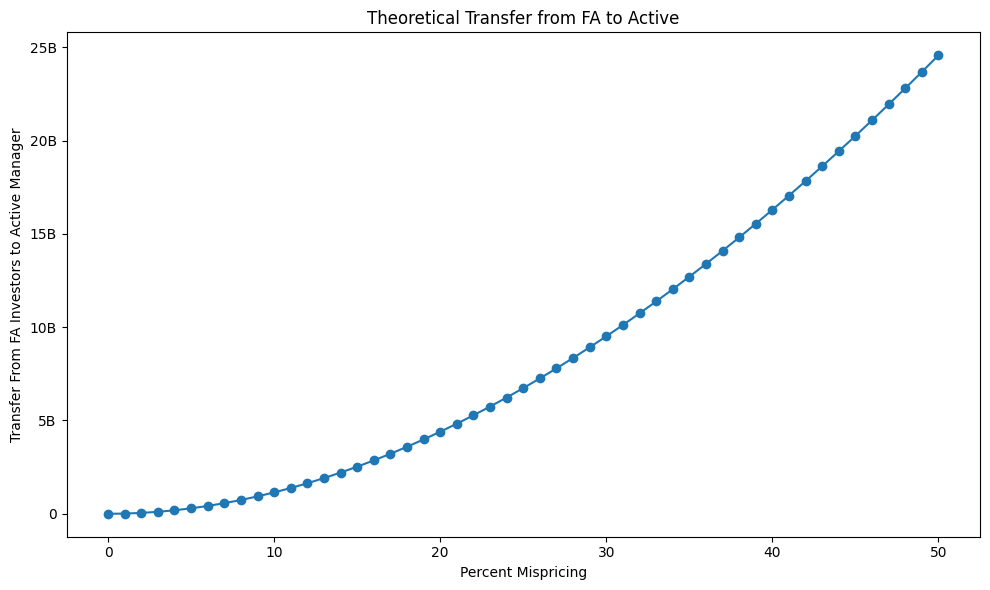

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Constants
omega = 0.6
p_curr = 100
K = 0.0001
W_0 = 1000000000000  # 1 trillion
C_0_initial = 400000000000
S_0_initial = 600000000000

# Range of p_priv values to evaluate
p_priv_values = range(100, 151)  # Values from 100 to 150
profits = []
mispricing_percentages = []
for p_priv in p_priv_values:
    C_0 = C_0_initial
    S_0 = S_0_initial
    
    profit = 0
    market_price = p_curr
    i = 1
    
    while market_price < p_priv:
        S_0 = S_0 * (1 + K)
        market_price = market_price * (1 + K)
        sig_quality = (p_priv - market_price) / market_price
        wealth = (W_0 * ((1 + omega * K) ** i))
        dollars_sold = omega * (K) * (1 - omega) * wealth
        S_0 = omega * wealth
        C_0 = (1 - omega) * wealth
        omega_new = S_0 / (S_0 + C_0)
        assert math.isclose(omega_new, 0.6, rel_tol=1e-5), f"omega_new is not close to 0.6, it's {omega_new}"
        
        trade_profit = sig_quality * dollars_sold
        profit += trade_profit
        i += 1

    mispricing_percent = ((p_priv / p_curr) - 1) * 100
    mispricing_percentages.append(mispricing_percent)
    final_wealth = C_0 + S_0
    total_profit = profit + final_wealth - (C_0_initial + S_0_initial)
    profits.append(profit)

# Function to format y-axis labels
def billions_and_millions(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.0f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    else:
        return f'{x:.0f}'
        
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(mispricing_percentages, profits, marker='o')
plt.title('Theoretical Transfer from FA to Active')
plt.xlabel('Percent Mispricing')
plt.ylabel('Transfer From FA Investors to Active Manager')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(billions_and_millions))

plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('figures/profit_vs_mispricing.pdf')

# Show the plot
plt.show()

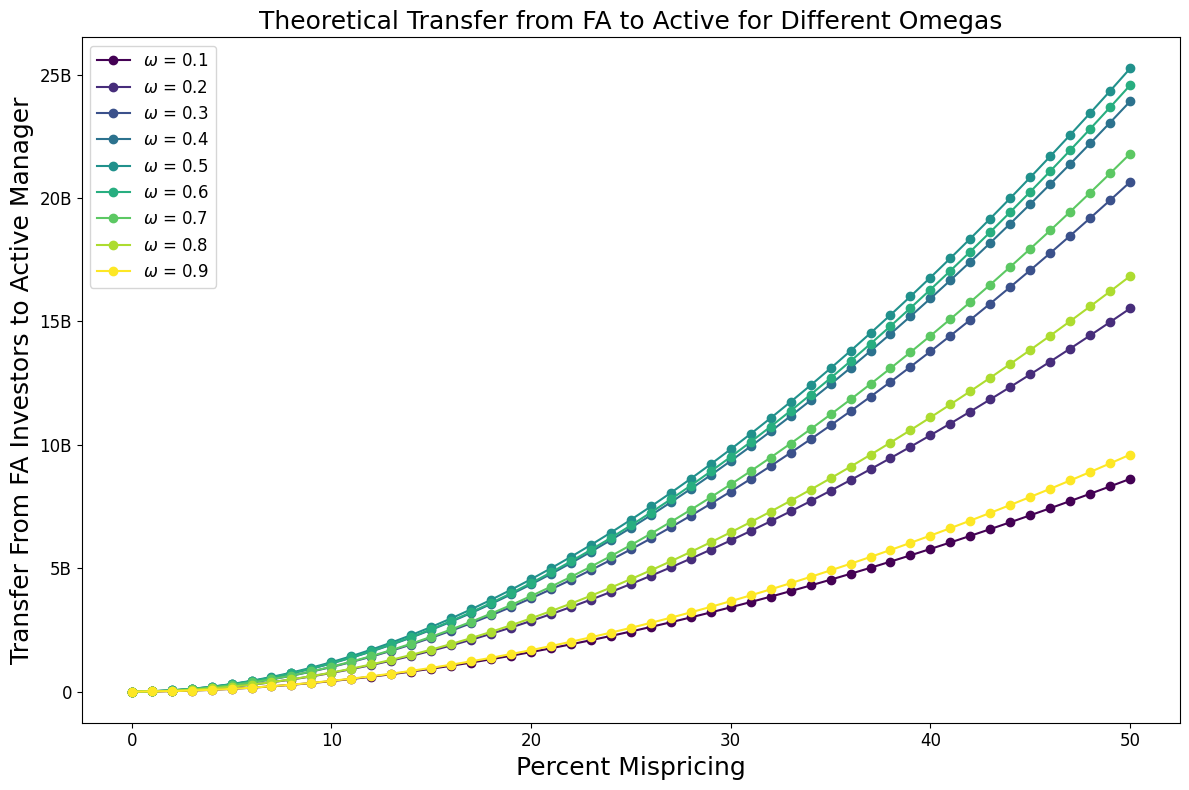

In [3]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm

norm = plt.Normalize(0.1, 0.9)
cmap = cm.viridis
# Constants
p_curr = 100
K = 0.0001
W_0 = 1000000000000  # 1 trillion
C_0_initial = 400000000000
S_0_initial = 600000000000

# Range of p_priv values to evaluate
p_priv_values = range(100, 151)  # Values from 100 to 150

# Omegas to evaluate
omega_values = [round(x * 0.1, 1) for x in range(1, 10)]

# Prepare the plot
plt.figure(figsize=(12, 8))

# Iterate over each omega value
for omega in omega_values:
    C_0_intial = W_0 * (1-omega)
    S_0_initial = W_0 * omega
    profits = []
    mispricing_percentages = []
    
    for p_priv in p_priv_values:
        C_0 = C_0_initial
        S_0 = S_0_initial
        
        profit = 0
        market_price = p_curr
        i = 1
        
        while market_price < p_priv:
            S_0 *= (1 + K)
            market_price *= (1 + K)
            sig_quality = (p_priv - market_price) / market_price
            wealth = (W_0 * ((1 + omega * K) ** i))
            dollars_sold = omega * K * (1 - omega) * wealth
            S_0 = omega * wealth
            C_0 = (1 - omega) * wealth
            omega_new = S_0 / (S_0 + C_0)
            assert math.isclose(omega_new, omega, rel_tol=1e-5), f"omega_new is not close to {omega}, it's {omega_new}"

            trade_profit = sig_quality * dollars_sold
            profit += trade_profit
            i += 1

        mispricing_percent = ((p_priv / p_curr) - 1) * 100
        mispricing_percentages.append(mispricing_percent)
        final_wealth = C_0 + S_0
        total_profit = profit + final_wealth - (C_0_initial + S_0_initial)
        profits.append(profit)
    
    # Plotting for the current omega
    color = cmap(norm(omega))
    # plt.plot(mispricing_percentages, profits, label=f'Omega = {omega:.1f}', marker='o', color=color)
    plt.plot(mispricing_percentages, profits, label=f'$\omega$ = {omega:.1f}', marker='o', color=color)


# Function to format y-axis labels
def billions_and_millions(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.0f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    else:
        return f'{x:.0f}'
        
# Finalize the plot
plt.title('Theoretical Transfer from FA to Active for Different Omegas', fontsize=18)
plt.xlabel('Percent Mispricing', fontsize=18)
plt.ylabel('Transfer From FA Investors to Active Manager', fontsize=18)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(billions_and_millions))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()

# Save the figure
plt.savefig('figures/profit_vs_mispricing_different_omegas.pdf')

# Show the plot
plt.show()